In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Just so I can see entire dataframes
pd.options.display.width = 0

In [2]:
# Set global matplotlib styles
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.1
plt.rcParams['axes.formatter.limits'] = (-5, 5)

# Ensure seaborn plots follow the same style
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.color': 'gray',
    'axes.grid': True
})


In [3]:
# Read data
raw_data = pd.read_csv('data/genre_dataset.csv')

In [4]:
# Extract features we care about
rel_data = raw_data[['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms', 'genre']]

In [5]:
rel_data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0.722,0.534,-10.161,0.0387,0.827000,0.00000,0.2560,0.9640,114.480,167600,country
1,0.586,0.477,-8.136,0.0243,0.590000,0.00000,0.0935,0.3080,82.987,199707,country
2,0.488,0.810,-6.948,0.1470,0.443000,0.00000,0.1360,0.9240,201.693,164627,country
3,0.509,0.157,-17.026,0.0491,0.971000,0.00114,0.2030,0.7920,156.395,182160,country
4,0.562,0.328,-13.066,0.0246,0.176000,0.01310,0.2650,0.1740,82.779,196480,country
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.806,0.873,-7.526,0.0492,0.008370,0.82100,0.0952,0.4160,128.001,367790,techno
4996,0.718,0.878,-9.611,0.0382,0.000789,0.83000,0.1000,0.0657,127.999,451000,techno
4997,0.542,0.991,-4.659,0.0537,0.025700,0.25000,0.3520,0.6500,175.031,223744,techno
4998,0.722,0.859,-8.398,0.0457,0.000003,0.94400,0.1350,0.3560,128.998,394419,techno


In [6]:
# Any missing values for any reason?
rel_data.isnull().sum().sum()

0

# Exploratory Analysis

### Distribution Analysis

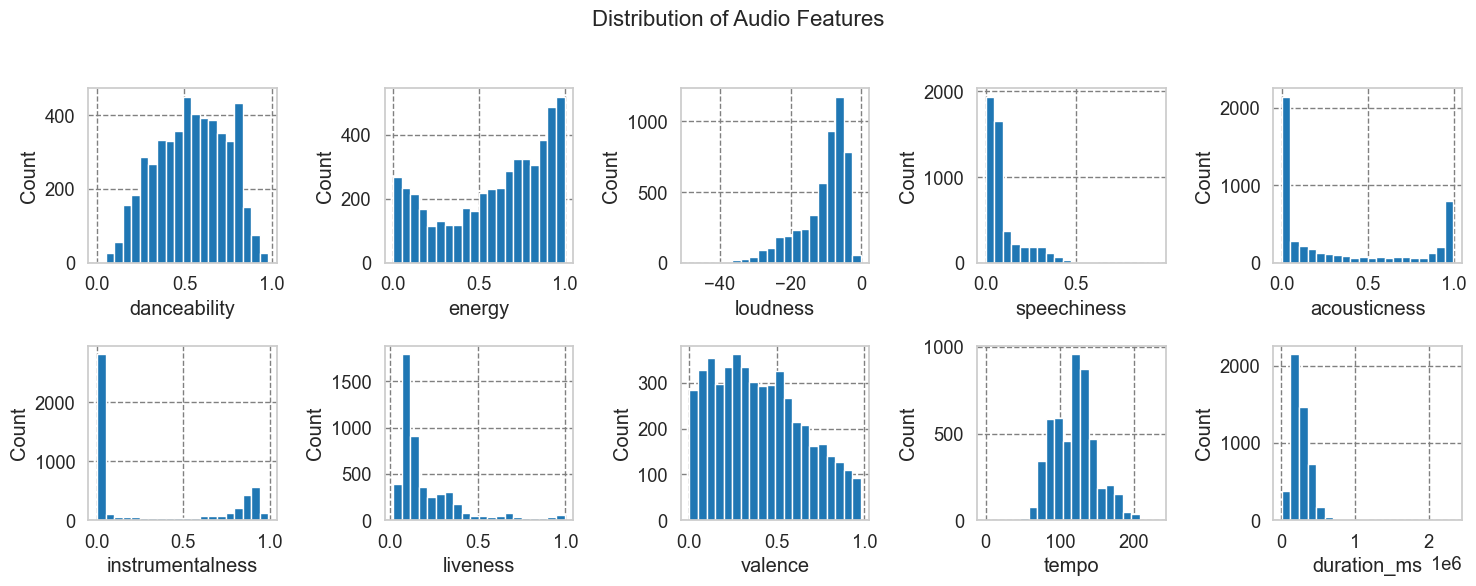

In [7]:
# Audio feature distributions
axes = rel_data.drop('genre', axis=1).hist(bins=20, figsize=(15, 6), layout=(2, 5), grid=True)

for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Count')
    ax.set_title('')

plt.suptitle('Distribution of Audio Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to fit the main title
plt.savefig('figs/exploratory_analysis/feature_distributions.png')
plt.show()

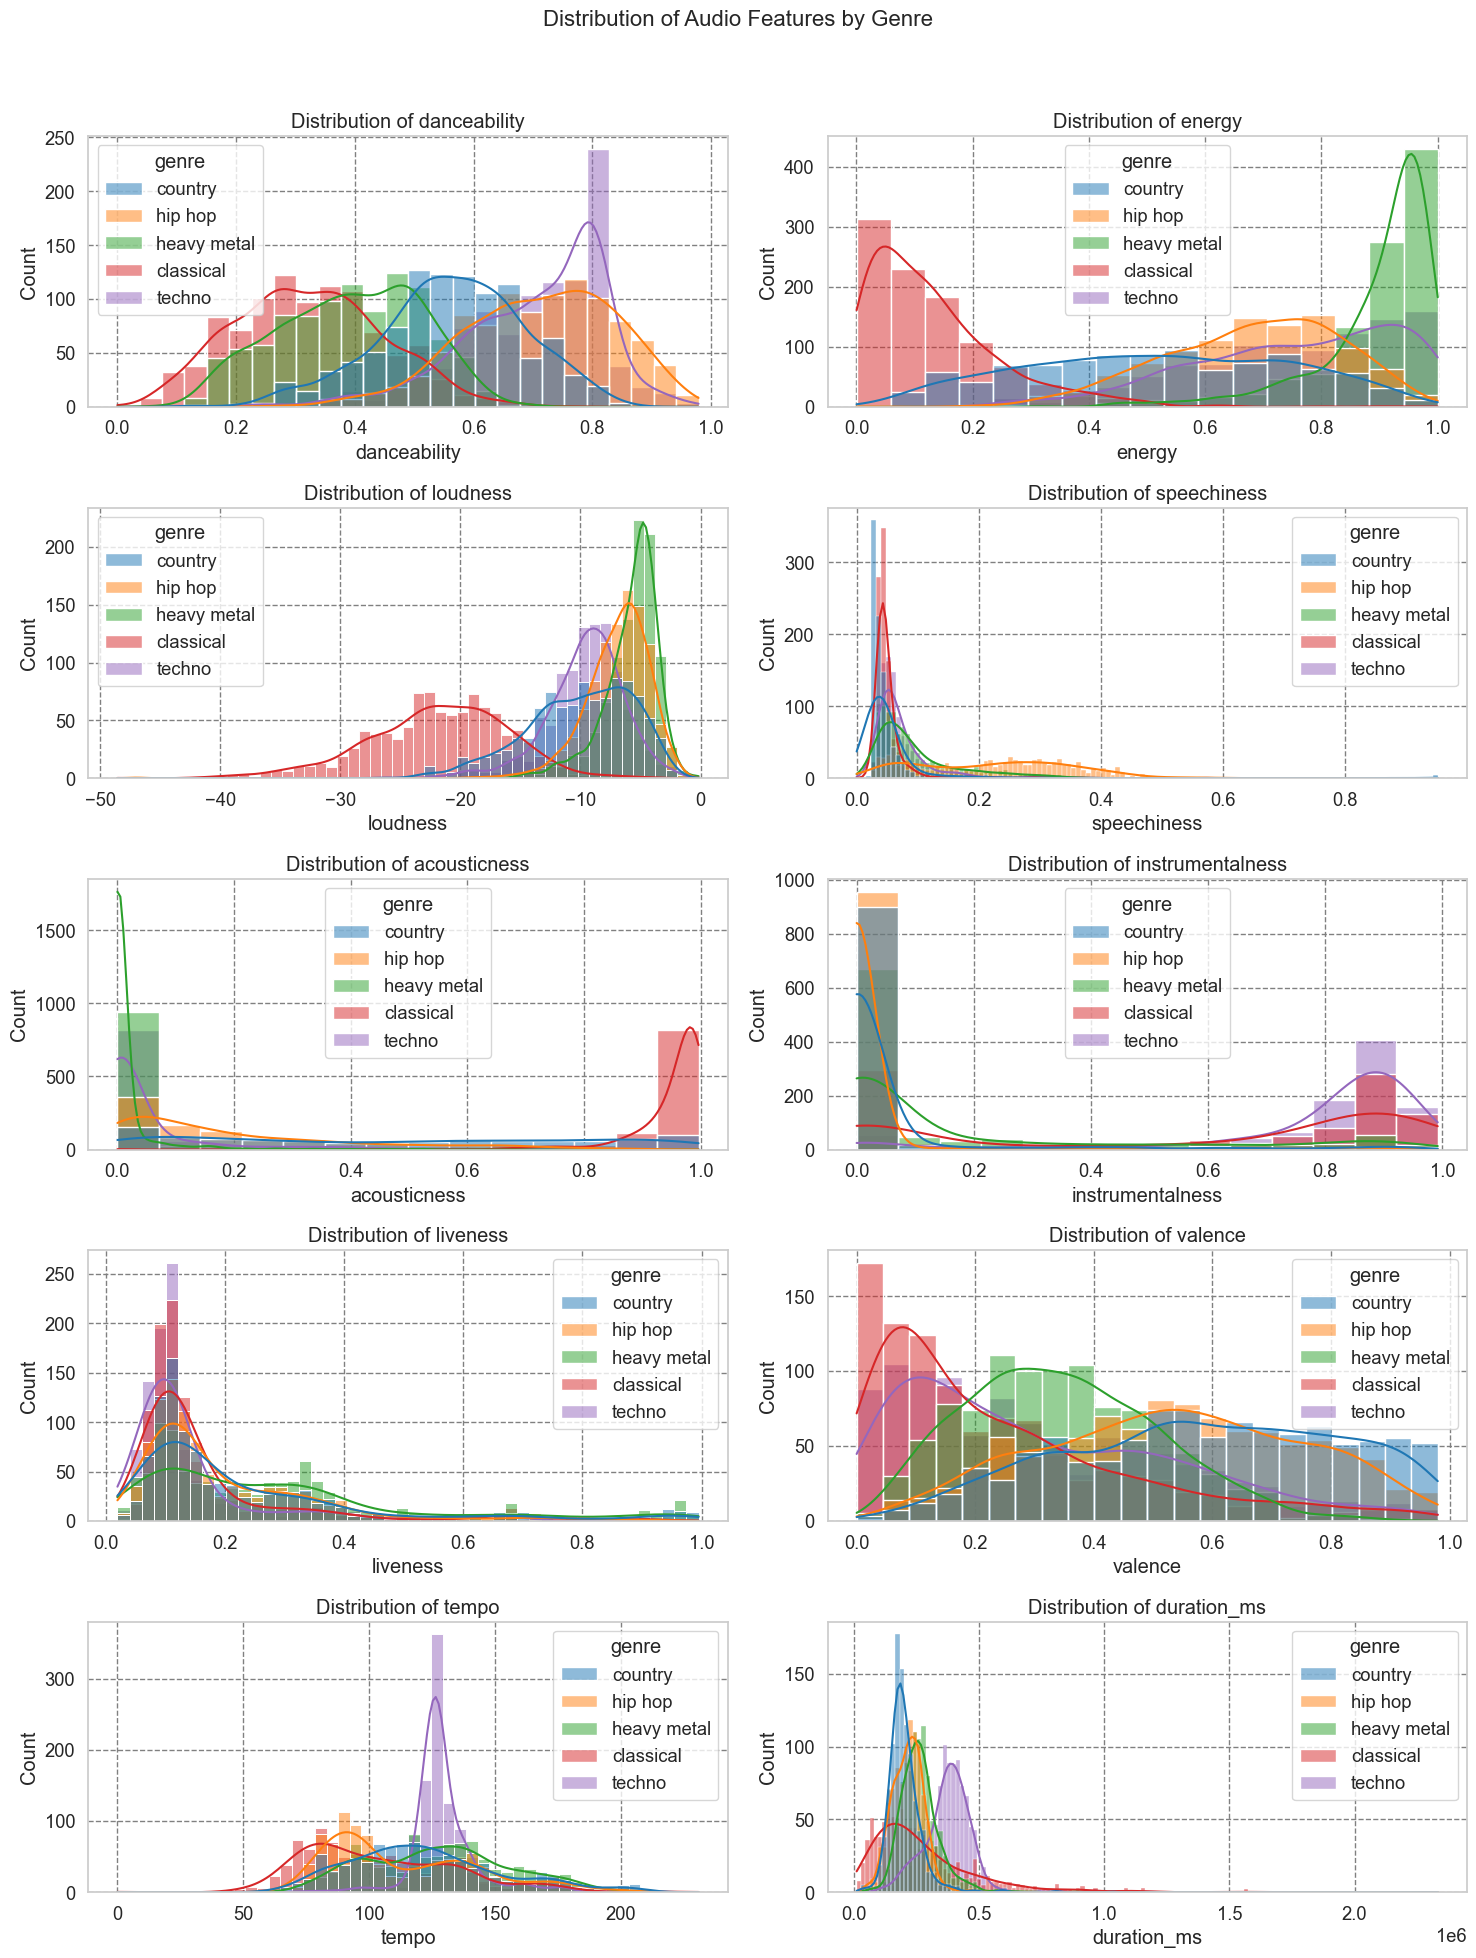

In [8]:
# Distributions by Genre
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms']

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Distribution of Audio Features by Genre', fontsize=16)

for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 2)
    sns.histplot(data=rel_data, x=feature, hue='genre', kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to fit the main title
plt.savefig('figs/exploratory_analysis/feature_distributions_by_genre.png')
plt.show()

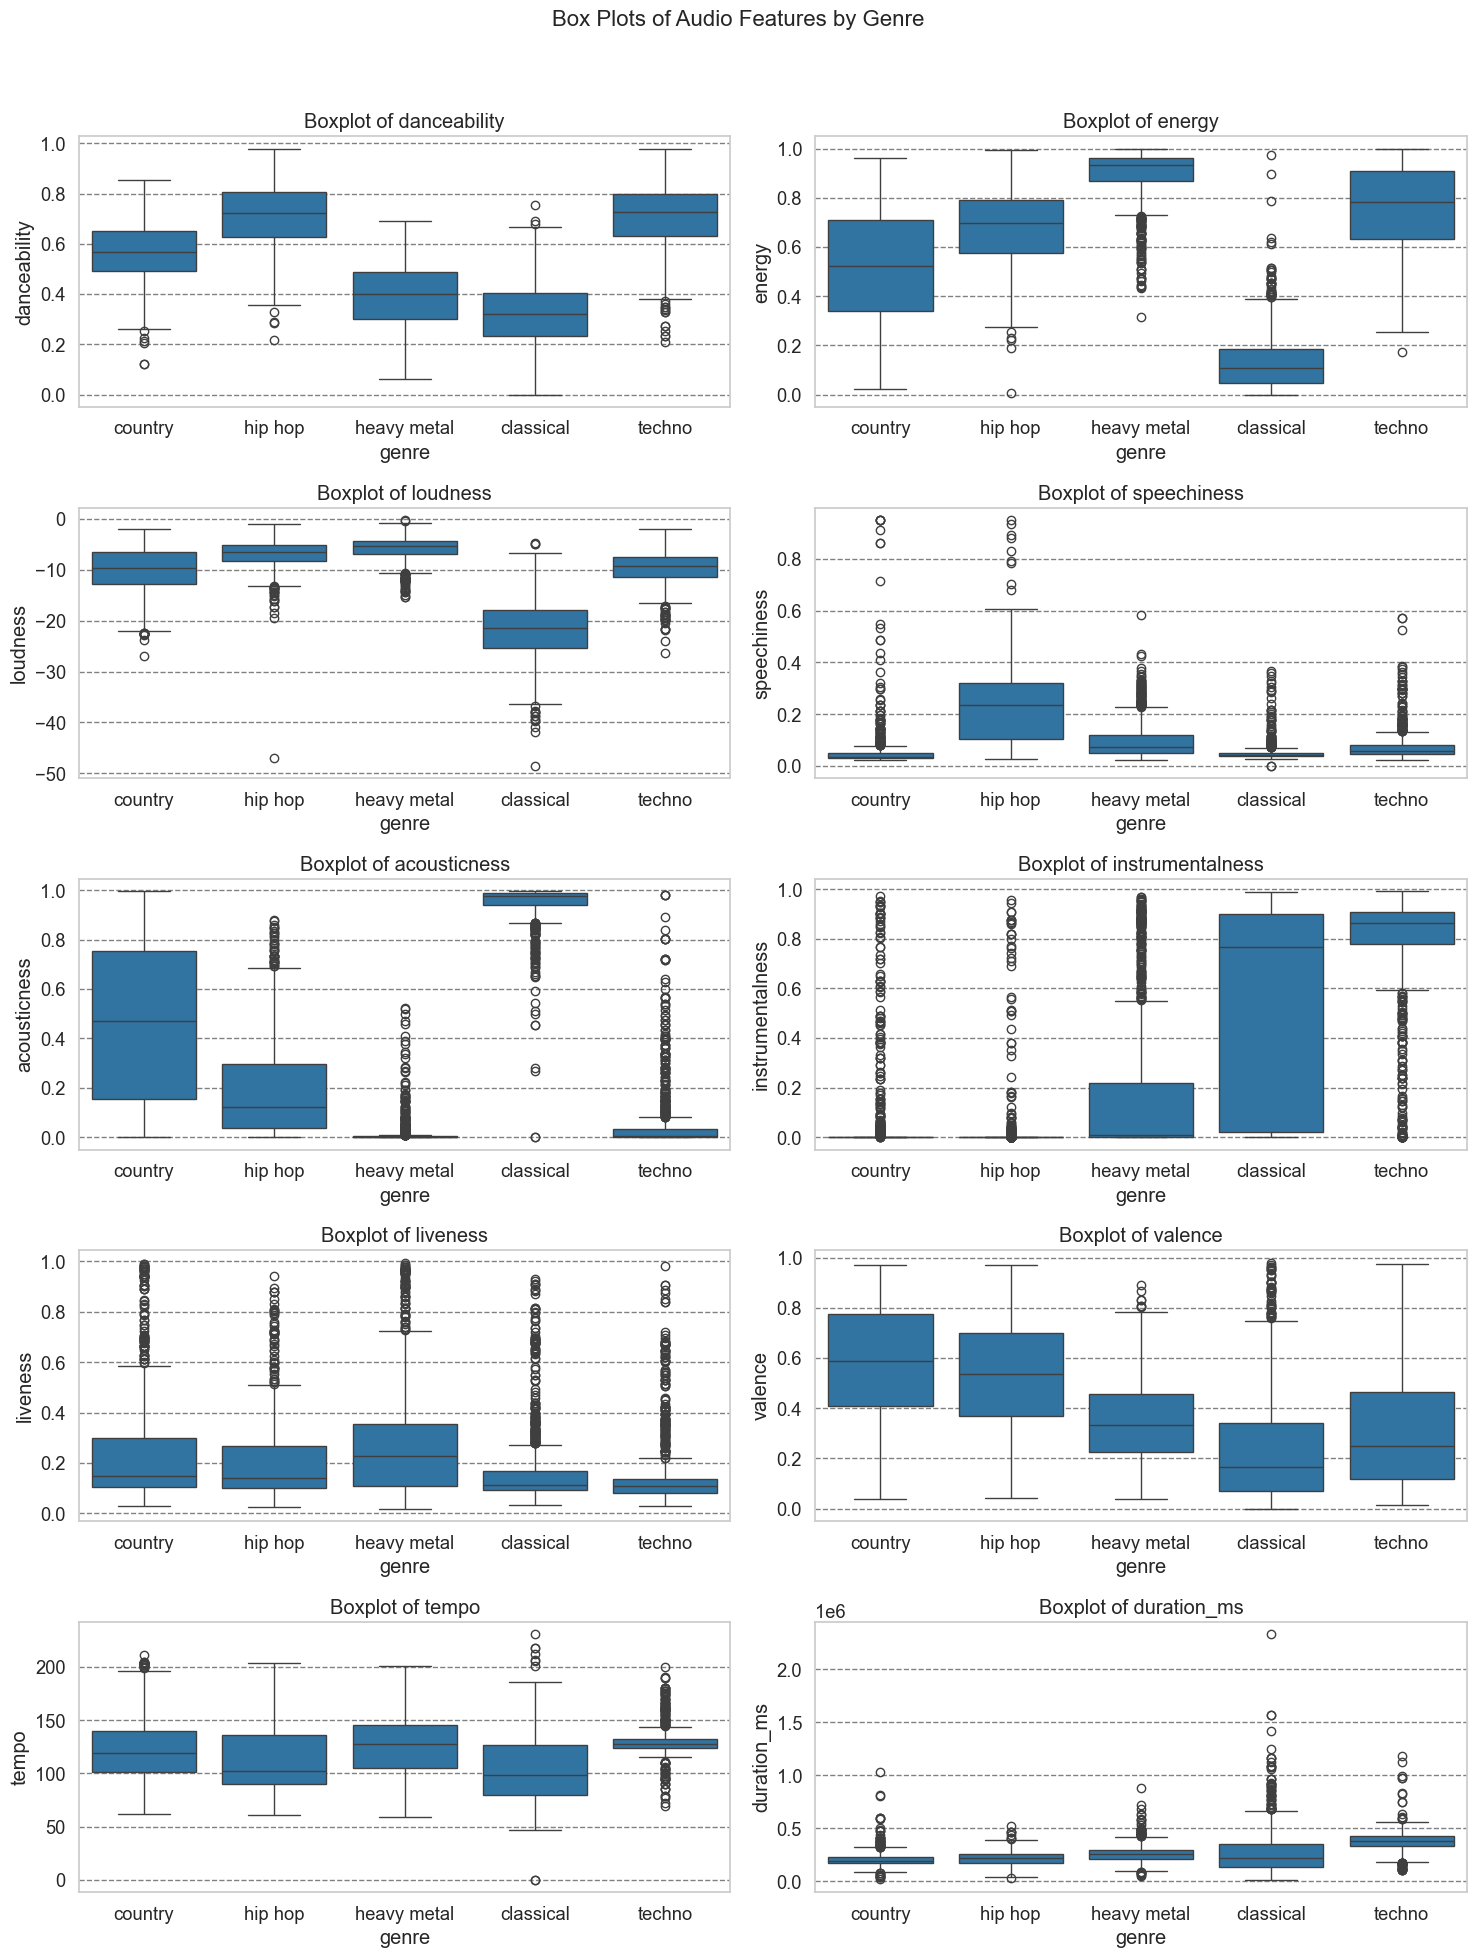

In [9]:
# Boxplots broken up by genre
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms']
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Box Plots of Audio Features by Genre', fontsize=16)

for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 2)
    sns.boxplot(x='genre', y=feature, data=rel_data, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to fit the main title
plt.savefig('figs/exploratory_analysis/boxplots_by_genre.png')
plt.show()

### Correlation Analysis

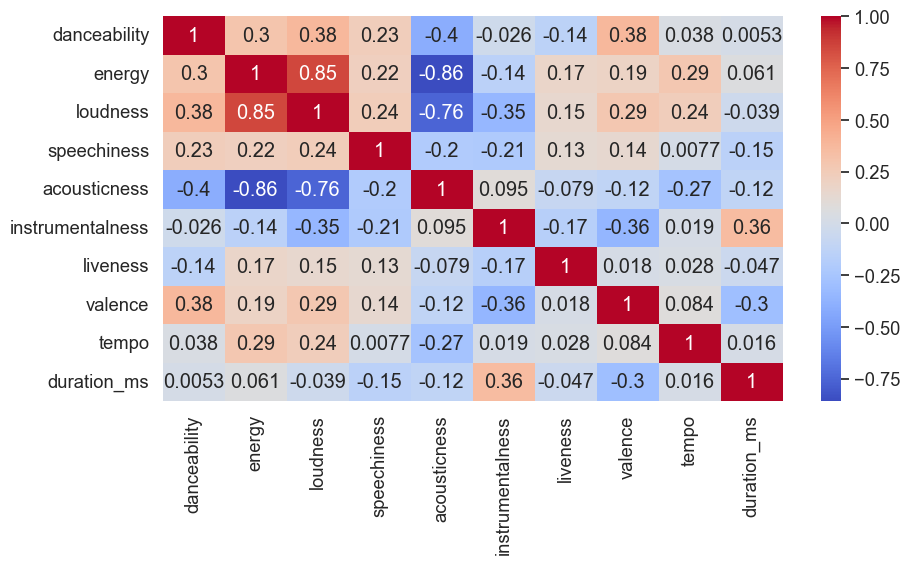

In [10]:
correlation_matrix = rel_data.drop('genre', axis=1).corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('figs/exploratory_analysis/correlations.png')
plt.show()

## PCA Visualization

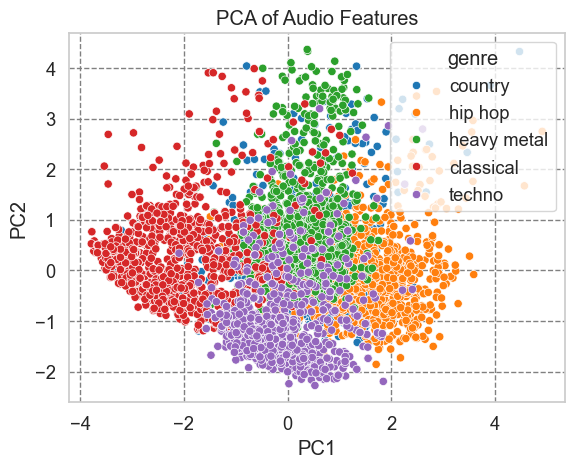

In [11]:
# 2D PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# New numeric features we care about
numeric_features = ['danceability', 'energy', 'valence', 'tempo',
                    'instrumentalness', 'liveness', 'speechiness']

features = rel_data[numeric_features]
features_scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['genre'] = rel_data['genre']

sns.scatterplot(x='PC1', y='PC2', hue='genre', data=principal_df)
plt.title('PCA of Audio Features')
plt.savefig('figs/exploratory_analysis/2d_pca.png')
plt.show()

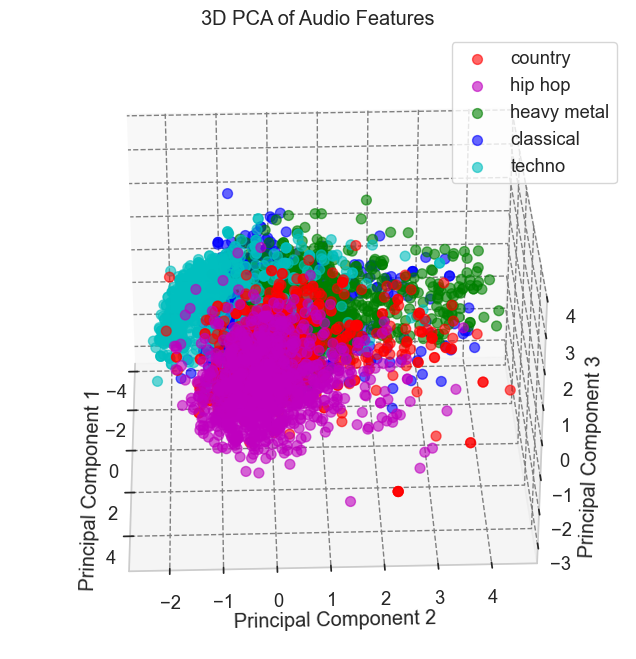

In [13]:
# 3D PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(rel_data[numeric_features])

# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
principal_df['genre'] = rel_data['genre']

# Plotting the 3D PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use different colors for each genre
colors = {'country': 'r', 'heavy metal': 'g', 'classical': 'b', 'techno': 'c', 'hip hop': 'm'}

for genre in principal_df['genre'].unique():
    indices_to_keep = principal_df['genre'] == genre
    ax.scatter(principal_df.loc[indices_to_keep, 'PC1'],
               principal_df.loc[indices_to_keep, 'PC2'],
               principal_df.loc[indices_to_keep, 'PC3'],
               c=colors[genre], s=50, alpha=0.6, label=genre)

# Adding labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Audio Features')
ax.legend()

# Function to rotate the plot
def rotate(angle):
    ax.view_init(elev=30, azim=angle)

# Animate the rotation
ani = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=100)

# Save the animation as an HTML file
ani.save('figs/exploratory_analysis/3d_pca_animation.html', writer='html')

plt.show()